# AutoEncoders

Use of autoencoders falls under supervised learning.<br>
- Autoencoders are used to compress (dimensionality reduction) and noise removal.<br><br>
- Use cases for autoencoders are sometimes called semi-supervised learning.<br><br>
- It's because we have the ability to use correct labels during the trainig of the autoencoder, but actually using the autoencoder, we can't produce metrics such as accuracy or RMSE (**R**oot **M**ean **S**quared **E**rror).<br><br>
- During the training of certain models, we will sometimes use historical data with correct labels, however during the actual use of model, we won't be able to use our previous evluation metrics.

## How AutoEncoders Work

Autoencoder is an unsupervised artificial neural network that learns how to efficiently compress and encode data then learns how to reconstruct the data back from the reduced encoded representation to a representation that is as close to the original input as possible.

The autoencoder is actually a very simple neural network and will feel similar to a multi-layer perceptron model. It's designed to reproduce it's output layer.

- The key difference between an autoencoder and a MLP (multi-layer perceptron) network is that the number of input neurons is equal to the number of output neurons.

### Example Autoencoder

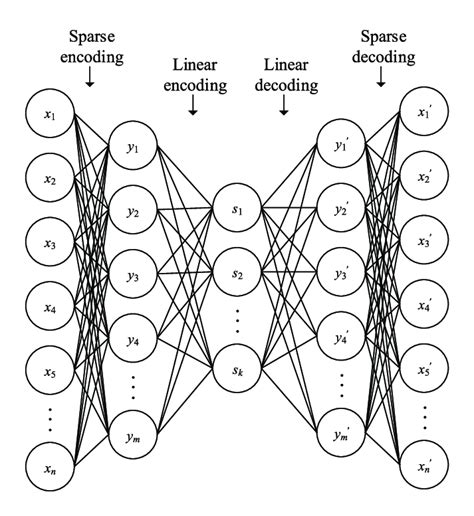

- Autoencoders start with ***n*** number of neurons, then slowly reduces down to a certain specified number ***k*** of neurons throughout the hidden layers. 

The main idea here is, in the middle of the autoencoder, reduce to some desired amount of neurons, essentially trying to capture what's important.

In the second half of the autoencoder, essentially the ***decoding*** part, we expand this back out to equal the same number of neurons that we started with.

- In order to produce the same output at the final layer, the internal hidden layers must find out what features are important.
- The output size is the same as the input layer.<br>

**NOTE:**<br>
- The hidden layer is not simply sub-selecting only certain features. 
- It's calculating combinations of the original features represent the original data in a reduced dimensional space.

The main idea behind an autoencoder: <br>
- The center hidden layer reduced the dimensionality to learn the ***most important combinations*** of original features.

## AutoEncoder Components

Autoencoders consist of 4 parts: <br>
- **Encoder:** In which the model learns how to reduce the input dimensions and compress the input data into an encoded representation.<br><br>
- **Bottleneck:** Which is the layer that contains the compressed representation of the data. This is the lowest possible dimensions of the input data.<br><br>
- **Decoder:** In which the model learns how to reconstruct the data from the encoded representation to be as close to the original input as possible.<br><br>
- **Reconstruction Loss:** This is the method that measures how well the decoder is performing and how close the output is to the original input.

## Types of AutoEncoders

- **Convolutional Autoencoder:** Convolutional Autoencoders(CAE) learn to encode the input in a set of simple signals and then reconstruct the input from them. In addition, we can modify the geometry or generate the reflectance of the image by using CAE. In this type of autoencoder, encoder layers are known as convolution layers and decoder layers are also called deconvolution layers. The deconvolution side is also known as upsampling or transpose convolution.<br><br>
- **Variational Autoencoders:** This type of autoencoder can generate new images just like GANs. Variational autoencoder models tend to make strong assumptions related to the distribution of latent variables. They use a variational approach for latent representation learning, which results in an additional loss component and a specific estimator for the training algorithm called the Stochastic Gradient Variational Bayes estimator. The probability distribution of the latent vector of a variational autoencoder typically matches the training data much closer than a standard autoencoder. As VAEs are much more flexible and customisable in their generation behaviour than GANs, they are suitable for art generation of any kind.<br><br>
- **Denoising autoencoders:** Denoising autoencoders add some noise to the input image and learn to remove it. Thus avoiding to copy the input to the output without learning features about the data. These autoencoders take a partially corrupted input while training to recover the original undistorted input. The model learns a vector field for mapping the input data towards a lower-dimensional manifold which describes the natural data to cancel out the added noise. By this means, the encoder will extract the most important features and learn a more robust representation of the data.<br><br>
- **Deep autoencoders:** A deep autoencoder is composed of two symmetrical deep-belief networks having four to five shallow layers. One of the networks represents the encoding half of the net and the second network makes up the decoding half. They have more layers than a simple autoencoder and thus are able to learn more complex features. The layers are restricted Boltzmann machines, the building blocks of deep-belief networks.

## AutoEncoders for Dimensionality Reduction

We can use an autoencoder for dimensionality reduction by separating it out into 2 parts:<br>
- Encoding
- Decoding

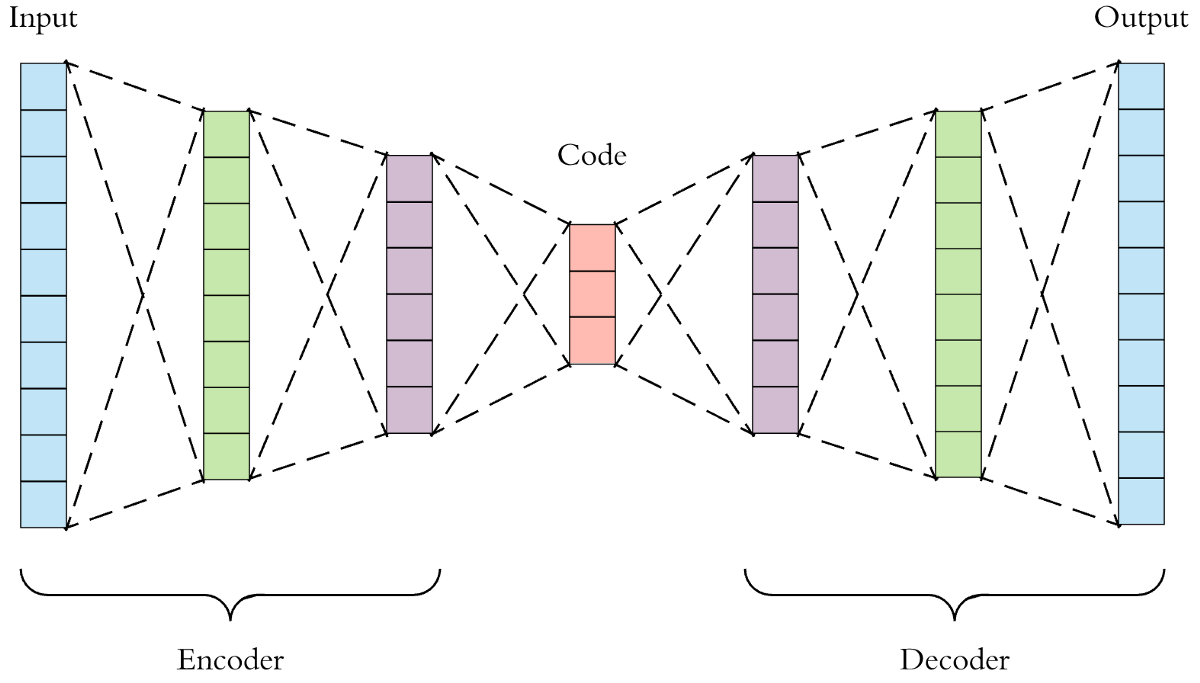

- This encoder can reduce dimensionality of the original data by taking combinations of the original features.<br>
Use cases does this have:<br>
    - Compress data 
    - Visualize data in lower dimensions
    - Reveal hidden relationships not clearly seen in higher dimensions 

## An Example of AutoEncoders for Dimensionality Reduction

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
from sklearn.datasets import make_blobs

In [3]:
%matplotlib inline

In [4]:
data = make_blobs(n_samples=300,
                n_features=2,
                centers=2,
                cluster_std=1.0,random_state=101)

In [5]:
X, y = data

In [6]:
np.random.seed(seed=101)
z_noise = np.random.normal(size=len(X))
z_noise = pd.Series(z_noise)

In [7]:
feat = pd.DataFrame(X)
feat = pd.concat([feat,z_noise],axis=1)
feat.columns = ['X1','X2','X3']

In [8]:
feat.head()

,X1,X2,X3
0,-8.877721,-6.760078,2.706850
1,0.630638,3.107075,0.628133
2,-0.240609,2.820690,0.907969
3,-7.839091,-8.207545,0.503826
4,-10.972908,-7.390676,0.651118


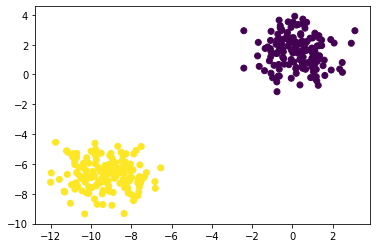

In [9]:
plt.scatter(feat['X1'],feat['X2'],c=y)

In [10]:
from mpl_toolkits.mplot3d import Axes3D

In [11]:
%matplotlib notebook

<IPython.core.display.Javascript object>


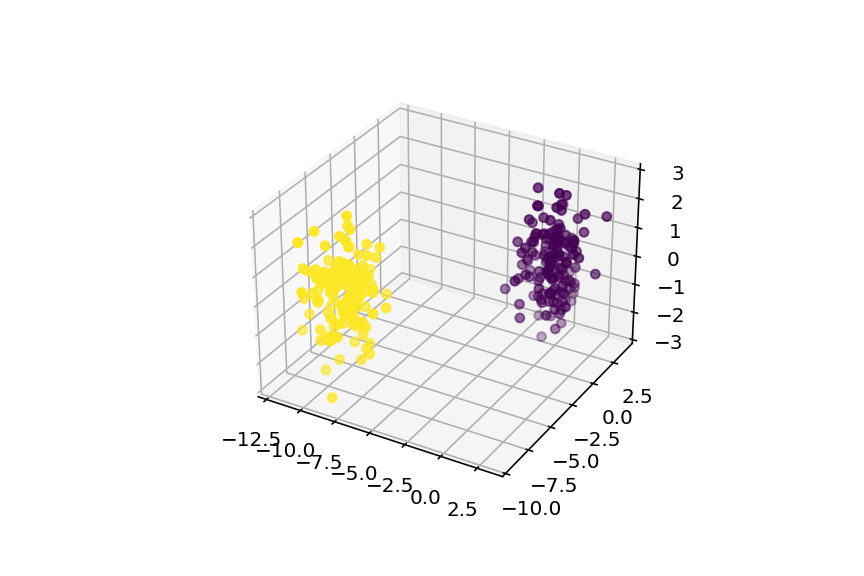

In [12]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(feat['X1'],feat['X2'],feat['X3'],c=y)

In [13]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

Init Plugin
Init Graph Optimizer
Init Kernel


In [14]:
# 3 --> 2
encoder = Sequential()
encoder.add(Dense(units=2,activation='relu',input_shape=[3]))

Metal device set to: Apple M1


2022-07-31 00:30:01.345630: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-07-31 00:30:01.345730: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [15]:
# 2 ---> 3
decoder = Sequential()
decoder.add(Dense(units=3,activation='relu',input_shape=[2]))

In [16]:
# ENCODER
# 3 ---> 2 ----> 3
autoencoder = Sequential([encoder,decoder])
autoencoder.compile(loss="mse" ,optimizer=SGD(learning_rate=1.5))

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
# Note how all the data is used! There is no "right" answer here
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(feat)

In [19]:
scaled_data

array([[2.07475524e-01, 1.95571963e-01, 9.85845750e-01],
       [8.35929679e-01, 9.39652004e-01, 6.09403243e-01],
       [7.78344698e-01, 9.18055791e-01, 6.60079904e-01],
       [2.76123683e-01, 8.64187747e-02, 5.86892040e-01],
       [6.89943218e-02, 1.48018660e-01, 6.13565724e-01],
       [7.93328662e-02, 2.66181866e-01, 4.37825912e-01],
       [8.58345111e-01, 7.43675286e-01, 3.42071017e-01],
       [1.13649812e-01, 1.61015757e-01, 6.05388874e-01],
       [7.97071012e-01, 9.69575837e-01, 1.30174900e-01],
       [8.04420781e-01, 8.70758874e-01, 6.29683804e-01],
       [1.45851346e-01, 3.01543367e-01, 5.91417162e-01],
       [5.50858487e-02, 2.00066208e-01, 3.88988121e-01],
       [8.28535567e-01, 9.61146391e-01, 5.29823913e-01],
       [2.59466086e-01, 1.83035970e-01, 3.58225464e-01],
       [8.67698238e-01, 7.58466630e-01, 3.26649038e-01],
       [2.98886547e-01, 1.72814182e-01, 6.68607073e-01],
       [7.44511367e-01, 8.79978328e-01, 5.30204031e-01],
       [8.41866546e-01, 8.28631

In [20]:
autoencoder.fit(scaled_data,scaled_data,epochs=5)

Epoch 1/5


2022-07-31 00:30:01.430797: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2022-07-31 00:30:01.430949: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-07-31 00:30:01.526500: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


10/10 [==============================] - 0s 6ms/step - loss: 0.1231
Epoch 2/5
10/10 [==============================] - 0s 5ms/step - loss: 0.0847
Epoch 3/5
10/10 [==============================] - 0s 5ms/step - loss: 0.0367
Epoch 4/5
10/10 [==============================] - 0s 4ms/step - loss: 0.0228
Epoch 5/5
10/10 [==============================] - 0s 4ms/step - loss: 0.0420


In [21]:
encoded_2dim = encoder.predict(scaled_data)

2022-07-31 00:30:01.853169: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [22]:
encoded_2dim

array([[0.00000000e+00, 0.00000000e+00],
       [1.30159676e+00, 0.00000000e+00],
       [1.23823881e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [1.06620324e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [1.30132163e+00, 0.00000000e+00],
       [1.19584322e+00, 0.00000000e+00],
       [5.55799901e-02, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [1.32146096e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [1.09033132e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [1.16549706e+00, 0.00000000e+00],
       [1.17367840e+00, 0.00000000e+00],
       [1.08946311e+00, 0.00000000e+00],
       [1.00864935e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [1.28097212e+00, 0.00000000e+00],
       [1.31663918e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00],
       [0.000000

In [24]:
%matplotlib inline

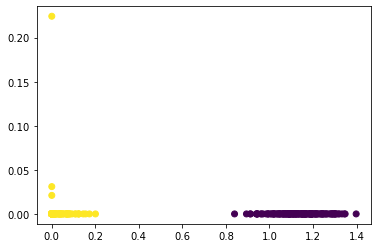

In [25]:
plt.scatter(encoded_2dim[:,0],encoded_2dim[:,1],c=y)